In [1]:
!pip install shap

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


📊 Plotting global feature importance...


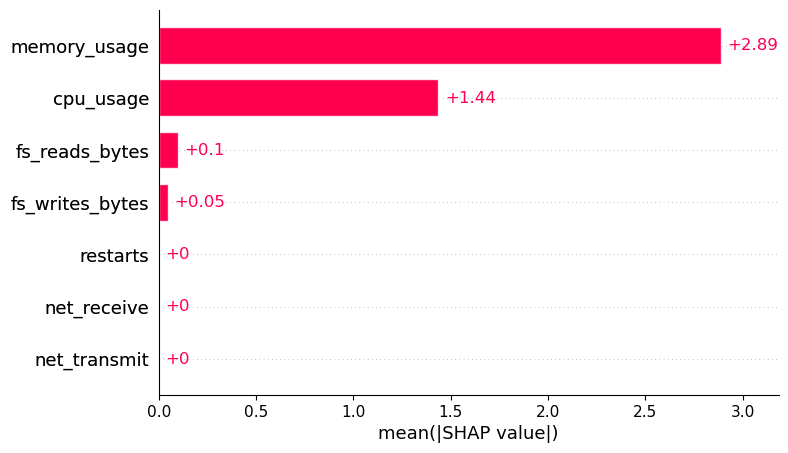

🔍 Plotting local explanation for sample 10...


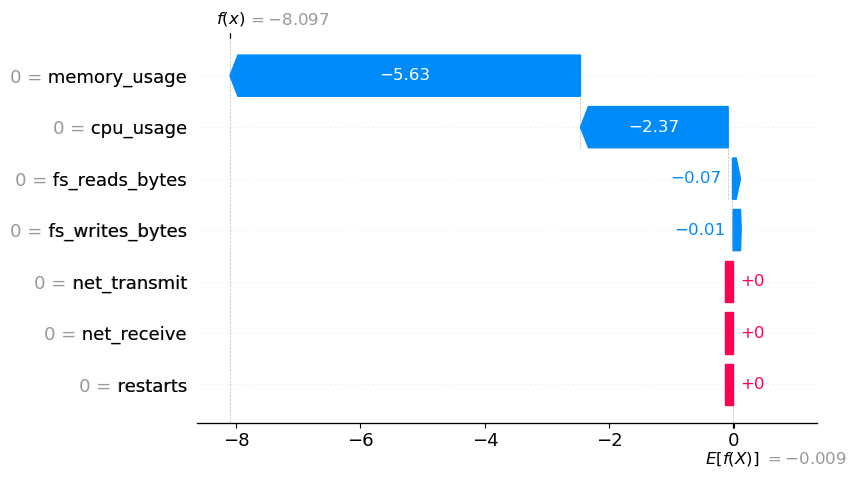

✅ SHAP values saved to xgboost_shap_values.csv


In [2]:
# ✅ Step 2: Imports
import shap
import xgboost as xgb
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# ✅ Step 3: Load model and data
model = joblib.load("xgboost_model.pkl")
df = pd.read_csv("preprocessed_dataset_0510.csv", parse_dates=["timestamp"])

features = [
    "cpu_usage", "memory_usage", "net_receive", "net_transmit",
    "fs_reads_bytes", "fs_writes_bytes", "restarts"
]
X = df[features]
y = df["label"]

# ✅ Step 4: Create SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X)

# ✅ Step 5: Global Feature Importance
print("📊 Plotting global feature importance...")
shap.plots.bar(shap_values, max_display=7)

# ✅ Step 6: Local Explanation for a single prediction (e.g. index 10)
print("🔍 Plotting local explanation for sample 10...")
shap.plots.waterfall(shap_values[10], max_display=7)

# ✅ Optional: Summary Plot (beeswarm)
# shap.summary_plot(shap_values, X)

# ✅ Save SHAP values (optional)
shap_df = pd.DataFrame(shap_values.values, columns=features)
shap_df["label"] = y
shap_df.to_csv("xgboost_shap_values.csv", index=False)
print("✅ SHAP values saved to xgboost_shap_values.csv")